# Exercises set 4

In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
print(f'Qiskit version: {qiskit.__version__}')

Qiskit version: 2.2.1


Exercises from [<a href="#ref1">Asfaw19</a>] 1.4 Single Qubit Gates:

## First Set

### Exercise a

Write the $H$-gate as the outer products of vectors $|0⟩$ ,$|1⟩$ , $|+⟩$ and $|−⟩$

In first place, we are going to compute all the cross products between the kets

#### Computational basis
$$
\ket{0}\bra{0} =
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}, \quad
\ket{0}\bra{1} =
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
$$

$$
\ket{1}\bra{0} =
\begin{pmatrix}
0 & 0\\
1 & 0
\end{pmatrix}, \quad
\ket{1}\bra{1} =
\begin{pmatrix}
0 & 0\\
0 & 1
\end{pmatrix}
$$



#### Plus/minus basis
$$
\ket{+}\bra{+} = \frac{1}{2}
\begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}, \quad
\ket{+}\bra{-} = \frac{1}{2}
\begin{pmatrix}
1 & -1\\
1 & -1
\end{pmatrix}
$$

$$
\ket{-}\bra{+} = \frac{1}{2}
\begin{pmatrix}
1 & 1\\
-1 & -1
\end{pmatrix}, \quad
\ket{-}\bra{-} = \frac{1}{2}
\begin{pmatrix}
1 & -1\\
-1 & 1
\end{pmatrix}
$$


#### Cross-basis products
$$
\ket{0}\bra{+} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
0 & 0
\end{pmatrix}, \quad
\ket{0}\bra{-} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1\\
0 & 0
\end{pmatrix}
$$

$$
\ket{1}\bra{+} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 0\\
1 & 1
\end{pmatrix}, \quad
\ket{1}\bra{-} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 0\\
1 & -1
\end{pmatrix}
$$

$$
\ket{+}\bra{0} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0\\
1 & 0
\end{pmatrix}, \quad
\ket{-}\bra{0} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0\\
-1 & 0
\end{pmatrix}
$$

$$
\ket{+}\bra{1} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 1\\
0 & 1
\end{pmatrix}, \quad
\ket{-}\bra{1} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 1\\
0 & -1
\end{pmatrix}
$$

Here we can see that:

$$\ket{+}\bra{0} + \ket{-}\bra{1}= 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 1\\
0 & -1
\end{pmatrix} +  \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0\\
1 & 0
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix} = H
$$

Which let us conclude that:

$$\therefore H = \ket{+}\bra{0} + \ket{-}\bra{1}$$


In [2]:
ket_0 = np.array([1,0]).reshape(-1,1)
ket_1 = np.array([0,1]).reshape(-1,1)
ket_plus = (1/np.sqrt(2)) * (ket_0 + ket_1)
ket_minus = (1/np.sqrt(2)) * (ket_0 - ket_1)

H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
H_from_outer_products = np.outer(ket_plus, ket_0) + np.outer(ket_minus, ket_1)

assert np.allclose(H, H_from_outer_products), "The H gate does not match the outer product representation."

### Exercise b

Show that applying the sequence of gates: $HZH$, to any qubit state is equivalent to applying an $X$-gate.

In order to show this, we will use the properties of $H$, $Z$ and $X$ gate:

$$X \ket{1} = \ket{0} \quad X \ket{1} = \ket{0}$$
$$Z \ket{0} = \ket{0} \quad Z \ket{1} = -\ket{1}$$
$$Z \ket{+} = \ket{-} \quad Z \ket{-} = \ket{+}$$
$$H \ket{0} = \ket{-} \quad H \ket{1} = \ket{+}$$
$$H \ket{-} = \ket{0} \quad H \ket{+} = \ket{1}$$

Now we will plug the computational basis in $H Z H$ and check if $X$ properties hold.

$$HZH \ket{0} = HZ \ket{-} = H\ket{+} = \ket{1} \Longrightarrow HZH \ket{0} = \ket{1}$$
$$HZH \ket{1} = HZ \ket{+} = H\ket{-} = \ket{0} \Longrightarrow HZH \ket{1} = \ket{0}$$

As we can see that $HZH$ holds the same properties as $X$ we can conclude that:

$$\therefore HZH = X$$

In [3]:
X = np.array([[0, 1], [1, 0]])
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
Z = np.array([[1, 0], [0, -1]])
HZH = H @ Z @ H

assert np.allclose(HZH, X), "The sequence HZH does not equal the X gate."

### Exercise c

Find a combination of $X, Z$ and H-gates that is equivalent to a $Y$-gate (ignoring global phase)

The Pauli matrices are defined as:

$$
X = 
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}, \quad
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}, \quad
Y = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}.
$$

Notice that

$$
Y = iXZ.
$$

The factor $ i $ is a **global phase**, which has no physical effect on the state of the qubit.  
Therefore, ignoring global phase, we can write:

$$
\therefore \; Y \equiv XZ
$$


## Second Set

### Exercise a

If we initialize our qubit in the state $|+⟩$ , what is the probability of measuring it in state $|−⟩$ ?

If we initialize our qubit in the state $ \ket{+} $, what is the probability of measuring it in the state $ \ket{-} $?

The states $ \ket{+} $ and $ \ket{-} $ are defined as:

$$
\ket{+} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}), \quad
\ket{-} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1}).
$$

The probability of measuring $ \ket{-} $ given that the qubit is in state $ \ket{+} $ is:

$$
P = |\braket{-|+}|^2.
$$

Compute the inner product:

$$
\braket{-|+} =
\left( \frac{1}{\sqrt{2}} (\bra{0} - \bra{1}) \right)
\left( \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) \right)
= \frac{1}{2} (\braket{0|0} + \braket{0|1} - \braket{1|0} - \braket{1|1})
= \frac{1}{2} (1 + 0 - 0 - 1) = 0.
$$

Therefore,

$$
\therefore P = |0|^2 = 0.
$$



### Exercise a

Use Qiskit to display the probability of measuring a $|0⟩$ qubit in the states $|+⟩$ and $|−⟩$

(Hint: you might want to use `.get_counts()` and `plot_histogram()`).


#### Process to measure $\ket{-}$

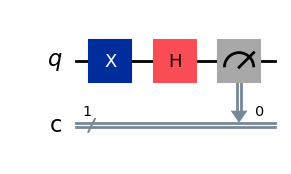

In [4]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

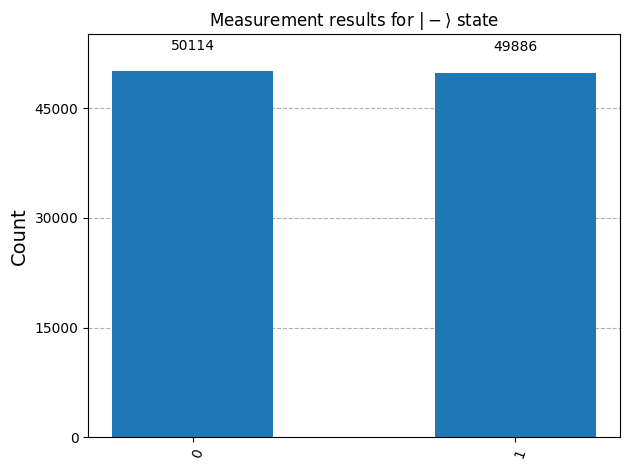

In [5]:
sim = AerSimulator()
compiled_qc = transpile(qc, sim)
result = sim.run(compiled_qc, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measurement results for $|-⟩$ state')

#### Process to measure $\ket{+}$

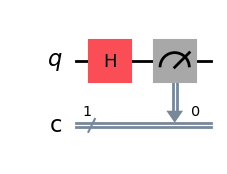

In [6]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

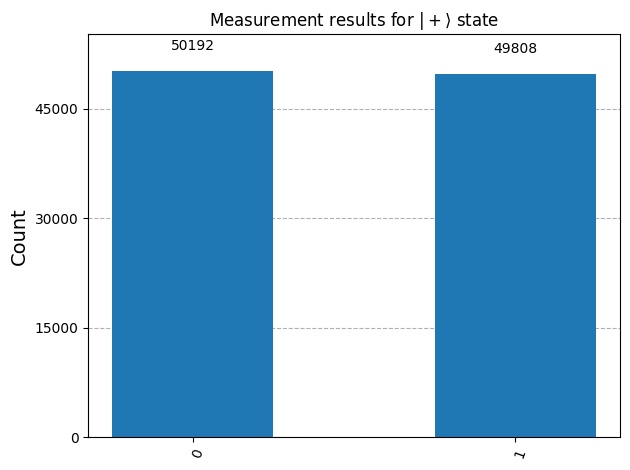

In [7]:
sim = AerSimulator()
compiled_qc = transpile(qc, sim)
result = sim.run(compiled_qc, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measurement results for $|+⟩$ state')

We can see here that $\ket{+}$ and $\ket{-}$ have each a probability of 50%

### Exercise c

Try to create a function that measures in the $Y $-basis.

#### Measuring in the Y-basis

In Qiskit, measurement is always performed in the computational $ Z $-basis.  
To measure in the $ Y $-basis, we apply the transformation $ S^\dagger H $ **before** measurement:

$$
| \psi \rangle_Y = S^\dagger H | \psi \rangle
$$

This effectively rotates the measurement basis from $ Z $ to $ Y $.


In [8]:
def meaure_in_Y(qc):
    qc.sdg(0)
    qc.h(0)
    qc.measure(0,0)
    return qc

##### Measure in the $Y$-Basis the computational basis


$$
P(+i|0) = |\braket{+i|0}|^2.
$$

Compute:

$$
\braket{+i|0} =
\frac{1}{\sqrt{2}}(\bra{0} - i\bra{1}) \ket{0}
= \frac{1}{\sqrt{2}}(1 - 0) = \frac{1}{\sqrt{2}}.
$$

Therefore:

$$
P(+i|0) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}.
$$

By normalization:

$$
P(-i|0) = 1 - P(+i|0) = \frac{1}{2}.
$$


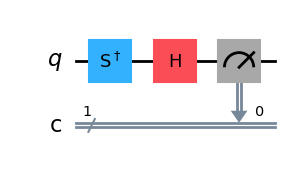

In [9]:
qc = QuantumCircuit(1,1)
qc_y = meaure_in_Y(qc)
qc_y.draw('mpl')

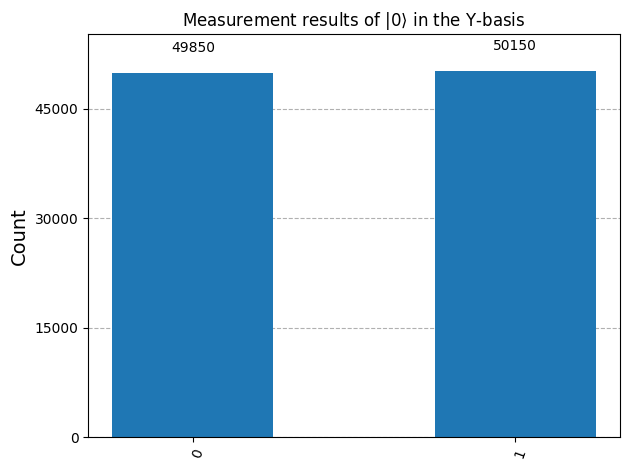

In [10]:
sim = AerSimulator()
compiled_qc = transpile(qc_y, sim)
result = sim.run(compiled_qc, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measurement results of $|0⟩$ in the Y-basis')

$$
P(+i|1) = |\braket{+i|1}|^2.
$$

$$
\braket{+i|1} =
\frac{1}{\sqrt{2}}(\bra{0} - i\bra{1}) \ket{1}
= \frac{1}{\sqrt{2}}(0 - i) = -\frac{i}{\sqrt{2}},
$$

so

$$
P(+i|1) = \left|-\frac{i}{\sqrt{2}}\right|^2 = \frac{1}{2}.
$$

And again,

$$
P(-i|1) = \frac{1}{2}.
$$

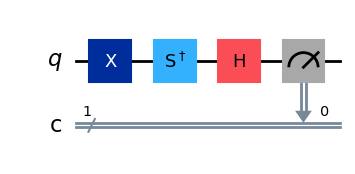

In [11]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc_y = meaure_in_Y(qc)
qc_y.draw('mpl')

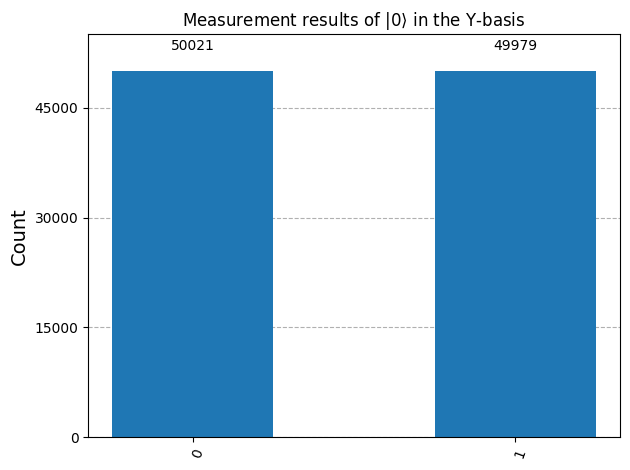

In [12]:
sim = AerSimulator()
compiled_qc = transpile(qc_y, sim)
result = sim.run(compiled_qc, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measurement results of $|0⟩$ in the Y-basis')

##### Measure $ \ket{+} $ and $ \ket{-} $ in the $ Y $-basis

Recall the definitions:

$$
\ket{+} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}), \quad
\ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1}).
$$

and the $ Y $-basis states are:

$$
\ket{+i} = \frac{1}{\sqrt{2}}(\ket{0} + i\ket{1}), \quad
\ket{-i} = \frac{1}{\sqrt{2}}(\ket{0} - i\ket{1}).
$$

We now compute $ P(+i|+) = |\braket{+i|+}|^2 $.


**Case 1: $ \ket{+} $ measured in $ Y $-basis**

Compute the inner product:

$$
\braket{+i|+} =
\left(\frac{1}{\sqrt{2}}(\bra{0} - i\bra{1})\right)
\left(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\right)
= \frac{1}{2}(\braket{0|0} + \braket{0|1} - i\braket{1|0} - i\braket{1|1})
= \frac{1}{2}(1 - i).
$$

Therefore,

$$
P(+i|+) = \left|\frac{1 - i}{2}\right|^2
= \frac{1}{4}(|1 - i|^2)
= \frac{1}{4}(1 + 1)
= \frac{1}{2}.
$$

Similarly,

$$
P(-i|+) = 1 - P(+i|+) = \frac{1}{2}.
$$

So the measurement is **equally probable** in both outcomes.

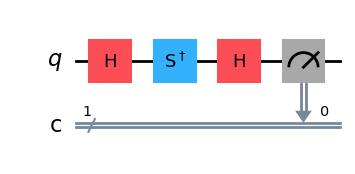

In [13]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc_y = meaure_in_Y(qc)
qc_y.draw('mpl')

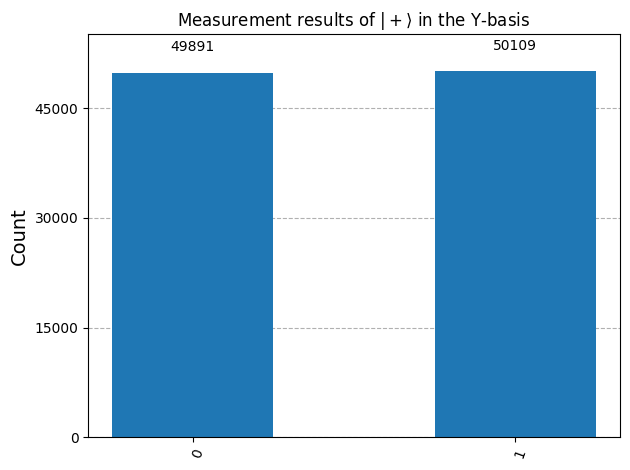

In [14]:
sim = AerSimulator()
compiled_qc = transpile(qc_y, sim)
result = sim.run(compiled_qc, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measurement results of $|+⟩$ in the Y-basis')

**Case 2: $ \ket{-} $ measured in $ Y $-basis**

Compute:

$$
\braket{+i|-} =
\left(\frac{1}{\sqrt{2}}(\bra{0} - i\bra{1})\right)
\left(\frac{1}{\sqrt{2}}(\ket{0} - \ket{1})\right)
= \frac{1}{2}(\braket{0|0} - \braket{0|1} - i\braket{1|0} + i\braket{1|1})
= \frac{1}{2}(1 + i).
$$

Hence,

$$
P(+i|-) = \left|\frac{1 + i}{2}\right|^2 = \frac{1}{2}.
$$

and

$$
P(-i|-) = \frac{1}{2}.
$$

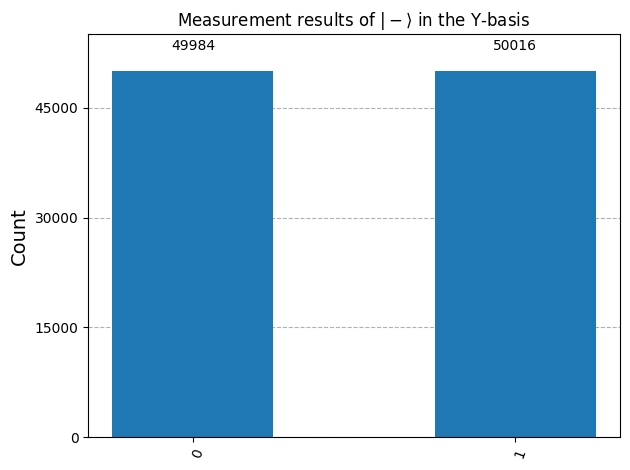

In [15]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc_y = meaure_in_Y(qc)
qc_y.draw('mpl')
sim = AerSimulator()
compiled_qc = transpile(qc_y, sim)
result = sim.run(compiled_qc, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measurement results of $|-⟩$ in the Y-basis')

## References
[Asfaw19] <a id="ref1"></a>  Abraham Asfaw et al., Learn Quantum Computation Using Qiskit. Qiskit Development Team. 2019